# Info 370 HW 04

Name: Ella Kim   

*Citations are hyperlinkedn (none for this particular HW)*

## Explore Central Limit Theorem

In this section you will see how does Central Limit Theorem (CLT) work. CLT states
two things:  

1. Means of random numbers tend to be normally distributed if the sample gets large.  

2. Variance of the mean tends to be 1
SVar X where S is the sample size and X is the random
variable we are analyzing.  

(This is actually a direct result of definition of expectation, and independence not really
CLT. But CLT is closely related to this result.)  

CLT, and how variance and mean value change when sample size increases, plays a very
important role in computing confidence intervals later.  
The problem contains two tasks: work with Bernoulli-distributed numbers (discrete distribution), and with Pareto-distributed numbers (continuous distribution).  
The task is structured in a way that you may want to create a function that takes in
sample size S and outputs all needed results, including the histogram. There will be quite a
bit of repetitive coding otherwise.


### 1.1: Discrete Random Variables

We start with a distribution that does not look at all normal. We create a RV  
X = {
−1 with probability 0.5; 
1 with probability 0.5.  
One way to sample such realizations is
np.random.randint(0,2, size=100)*2 - 1


In [2]:
# np.random.randint(0,2, size=100)*2 - 1

#### 1
Calculate the expected value and variance of this random variable. Note: these
are theoretical values and not related to any samples.  

Hint: read lecture notes 1.3.4 (Expected Value and Variance), and Openintro Statistics 3.4 (Random variables), in particular 3.4.2 (Variability). I recommend to use the
shortcut formula Var X = E X
^2 − (E X)
^2
.

In [417]:
# imports
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

# did not set seeds as overall pattern should be same regardless, and instructions did not say to do so

# for example to see how works
sample = np.random.randint(0,2, size=100)*2 - 1
list_sample = sample.tolist()

#calculate expected X for binomial 
expected_val_x = (.5)*(-1) + (.5)*(1)
#expected_val_x #sanity checks, would ideally be 0 for 50/50 probablility 

#(-1^2 = 1 and 1^2 = 1)
variance_x = (.5)*(1) + (.5)*(1) - (expected_val_x)**2 #technically 0
#variance_x #sanity check, would ideally be 1 for .5 + .5 probablility 

print("Expected value: " + str(expected_val_x))
print("Variance: " + str(variance_x))

Expected value: 0.0
Variance: 1.0


#### 2
Choose your number of repetitions R. 1000 is a good number but you can also
take 10,000 or 100,000 to get smoother histograms.

Note: number of repetitions R is not the same as sample size S here. You will create
samples of size S for R times. For instance you create R = 1000 times a sample of size
S = 5. Please understand the difference, it is a fequent source of confusion!


In [418]:
num_trials = 1000  #took suggested number in directions

#### 3

Create a vector of R random realizations of X. Make a histogram of those. Comment the shape of the histogram.


Note: in this case we have R = 1000 repetitions and samples of size S = 1–we look at
individual realizations.

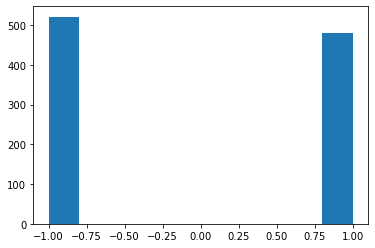

In [419]:
individ = []
#getting 1000 single random of -1 or 1
for i in range(0,num_trials):
    ind_val = np.random.randint(0,2, size=1)*2 - 1
    individ.append(ind_val[0])
#individ #sanity check

#plot histogram of R single 
plt.hist(individ)
plt.show()

There is hardly a shape except a clear bimodal distribution in ~half of the data is in the +/- 0.75-1.00 bins. 

#### 4

 Compute and report mean and variance of the sample you created (just use
np.mean and np.var). Compare these numbers with the theoretical values computed
in 1.


In [420]:
#calculate mean and var of R individual random trials of -1, 1 
mean_individ = np.mean(individ)
var_individ = np.var(individ)

#print sample results
print("Mean: " + str(mean_individ))
print("Variance: " + str(var_individ))

Mean: -0.042
Variance: 0.9982360000000001


The values in this section are very close to the intuitive 50/50 probability, as the mean is close to 0 and the variance is close to 1.

#### 5

 Now create R pairs of random realizations of X (i.e. sample size S = 2). For each
pair, compute its mean. You should have R means. Make the histogram. How does this
look like? 

Hint: while you can do this using loops, it is more useful to create a R × 2 matrix of
realizations of X, where each row represents one pair. Thereafter you compute means
by rows and you have R pair means. See python notes numpy statistical functions for
an example.


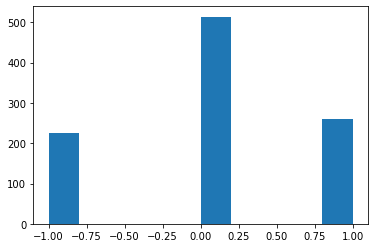

In [421]:
#make function to get mean and var: for efficiency
def getStats(x):
    stats = []
    stats.append(np.mean(x))
    stats.append(np.var(x))
    return stats

#make function to get the R trials of size s random drawings of -1, 1
def getRand(s):
    pairs = []
    mean_pairs = []
    for i in range(0, num_trials):
        curr_trial = np.random.randint(0,2, size=s)*2 - 1
        pairs.append(curr_trial)
        pairs_stats = getStats(curr_trial)
        mean_pairs.append(pairs_stats[0])
    return(mean_pairs)

#get R vector for pairs
mean_pairs = getRand(2)

#plot results
plt.hist(mean_pairs)
plt.show()

It appears, that out of the R (1000) trials, half of the means were 0 and the rest either -1 or 1 (as of now, appears like a multimodal distribution)


#### 6

Compute and report mean of the R pair means, and variance of the means.

In [422]:
#print sample results
print("Mean of R pair means: " + str(np.mean(mean_pairs)))
print("Variance of R pair means: " + str(np.var(mean_pairs)))

Mean of R pair means: 0.034
Variance of R pair means: 0.48484399999999994


#### 7

Compute the expected value and variance of the pair means, i.e. the theoretical
concepts. Compare the theoretical values with the sample values above.  

Note that according to CLT tells, the variance of a pair mean should be just 1/2 of what
you got above as for pairs S = 2.

In [423]:
#calculate E(X) and var of RV / s
#diff types of outcomes: (-1,1)/(1,-1), (1,1), and (-1,-1), so means (0, 1, and -1)
ev_pairs = (1/2)*(0)+(1/4)*(-1)+(1/4)*(1) #just to confirm that E(X) will always be 0
#((-1)^2 = 1, 0^2 = 0, and 1^2 = 1)
var_pairs = ((1/4)*(1) + 
              (1/2)*(0) + 
              (1/4)*(1)) - ev_pairs**2

#print theoretical results
print("Expected value of pair means: " + str(ev_pairs))
print("Variance of pair means by hand: " + str(var_pairs))

Expected value of pair means: 0.0
Variance of pair means by hand: 0.5


The correpsonding values are similar to one another (i.e. small difference)

*Instructor stated in Microsoft Teams that sample mean = variance of RV / sample size s

#### 8

Now instead of pairs of random numbers, repeat this with 5-tuples of random
numbers (i.e. S = 5 random numbers per one repetition, and still R = 1000 repetitions
in total). Compare the theoretical and sample version of mean and variance of 5-tuples.
Are they similar? Do you spot any noticeable differences in the histogram compared to
your previous histogram?


Mean of R 5-tuples means: -0.012799999999999997
Variance of R 5-tuples means: 0.19407616000000003
Expected value of pair means: 0.0
Variance of pair means: 0.2


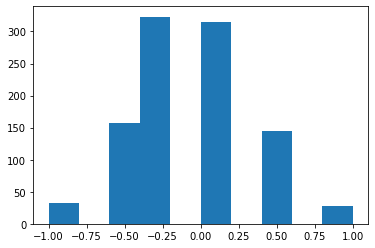

In [424]:
#get R vector for 5 s
mean_five = getRand(5)

#plot results
plt.hist(mean_five)

#print sample results
print("Mean of R 5-tuples means: " + str(np.mean(mean_five)))
print("Variance of R 5-tuples means: " + str(np.var(mean_five)))

#calculate E(X) and var of RV / s
ev_five = (1/32)*(1)+(1/32)*(-1)+(5/32)*(4/5)+(5/32)*(-4/5)+(10/32)*(1/5)+(10/32)*(-1/5)

#print theoretical results
print("Expected value of pair means: " + str(ev_five)) #just to confirm that E(X) will always be 0
print("Variance of pair means: " + str(variance_x/5)) # first variance of RV / by 5


Like the last section, the corresponding values are very similar, but now the difference is smaller, which would make me think that, as this graph is becoming more normal-distribution looking, the sample mean and variance will become closer and closer to the theoretical mean and variance 

#### 9


Repeat with 25-tuples...

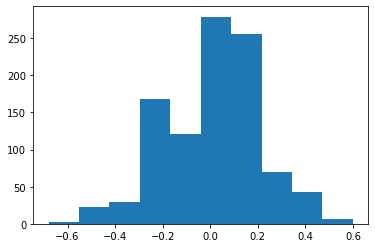

Mean of R 5-tuples means: 0.0044
Variance of R 5-tuples means: 0.04183664
Expected value of pair means: 0.0
Variance of pair means: 0.04


In [425]:
#get R vector for 5 s
mean_twentyfive = getRand(25)

#plot results
plt.hist(mean_twentyfive)
plt.show()

#print sample results
print("Mean of R 5-tuples means: " + str(np.mean(mean_twentyfive)))
print("Variance of R 5-tuples means: " + str(np.var(mean_twentyfive)))

#print theoretical results
# from here on, EX should always be 0
print("Expected value of pair means: " + str(ev_five))
print("Variance of pair means: " + str(variance_x/25)) # first variance of RV / by 5

Now there are no longer significant gaps of values between -1 and 1, where one could say that the distribution is now unimodal (but not yet very normal-looking).

#### 10

 ... and with 1000-tuples.


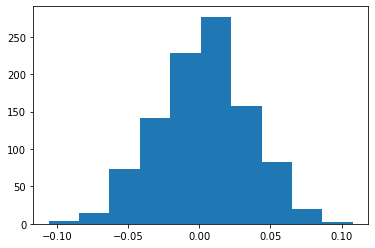

Mean of R 5-tuples means: 0.00286
Variance of R 5-tuples means: 0.0010252124
Expected value of pair means: 0.0
Variance of pair means: 0.001


In [426]:
#get R vector for 1000 s
mean_thousand = getRand(1000)

#plot results
plt.hist(mean_thousand)
plt.show()

#print sample results
print("Mean of R 5-tuples means: " + str(np.mean(mean_thousand)))
print("Variance of R 5-tuples means: " + str(np.var(mean_thousand)))

#print theoretical results
print("Expected value of pair means: " + str(ev_five))
print("Variance of pair means: " + str(variance_x/1000)) # first variance of RV / by 5

The plot now looks for certain normal compared to the previous one, confirming the predicted pattern that as size/tuple increses, the closer the mean and variance are to 0

#### 11

Comment on the tuple size, and the shape of the histogram.

As the tuple size increases, the more the binomial proability's means look like a normal distribtion

#### 12

 Explain why do the histograms resemble normal distribution as S grows.
In particular, explain what happens when we move from single values S = 1 to pairs
S = 2. Why did two equal peaks turn into a “山”-like histogram?


As we increase the number of S, i.e. when we increased from 1 to 2, it added another value to solving for the mean, so the mean could now be between the two binomial outcomes, and it will continue to have more possible values between -1 and 1, and as the chances for the tuples to have all -1 or 1 decreases and values for half of -1 and 1 increases (i.e. mean is 0), the distribution looks more normal. 

### 1.2: Pareto-distributed Random Numbers

(Intro explanation: refer to pdf file of questions)
#### 1

Create a vector of R pareto(5) random numbers. Make a histogram of those.
Comment the shape of the histogram.  

Note: We choose the parameter α = 5 as Pareto gets nasty as α gets too small (α ⩽ 2).
We just want to steer away from those troubles.  

Hint: use np.random.pareto(5, size) to create such numbers.

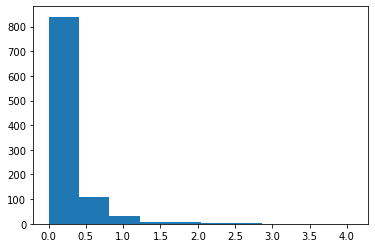

In [427]:
pareto_5 = []

#get R vector of pareto random values for 1 s
for i in range(0,num_trials):
    pareto_5.append(np.random.pareto(5))
    
#plot results
plt.hist(pareto_5)
plt.show()

The distribution is extremely right-skewed, a seeminly exponential distribution

#### 2

Compute and report mean and variance of the sample you created (just use
np.mean and np.var). Compare these numbers with the theoretical values computed
from (2) and (3).

Hint: these should be similar.

In [428]:
#print sample results
print("Sample mean: " + str(np.mean(pareto_5)))
print("Sample variance: " + str(np.var(pareto_5)))

#make function to get theoretical mean and var: for efficiency
def getEVar(shape, s):
    stats = []
    stats.append(1/(shape-1))
    stats.append((shape / (((shape-1)**2)*(shape-2)))/s)
    return(stats)
    
#compute theoretical mean and var
stats_5 = getEVar(5, 1)

#print theoretical results
print("Expected value: " + str(stats_5[0])) #Ex will always be the same
print("Variance of RV: " + str(stats_5[1])) 

Sample mean: 0.24677622484488773
Sample variance: 0.11814896234220176
Expected value: 0.25
Variance of RV: 0.10416666666666667


Can confirm that they are similar like hinted in directions

#### 3

Now create R pairs of random Paretos. For each pair, compute its mean. You
should have R means. Make the histogram. How does this look like?


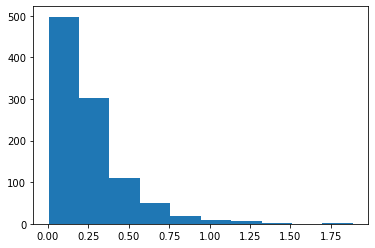

In [429]:
#make function to get the R trials of size s random drawings of pareto with alpha 5 (will default to that in each section)
def getMeanPareto(alpha, size):
    pareto_list = []
    pareto_mean = []
    for i in range(0,num_trials):
        pareto_list.append(np.random.pareto(alpha, size))
        pareto_mean.append(np.mean(pareto_list[i]))
    return(pareto_mean)

#get R vector for pair s
pareto_pair = getMeanPareto(5, 2)

#plot results
plt.hist(pareto_pair)
plt.show()


The histogram looks less skewed to the right as the last ploted one in part 1, but not by much

#### 4

Compute and report mean of the pair means, and variance of the means.

In [430]:
#print sample results
print("Sample mean: " + str(np.mean(pareto_pair)))
print("Sample variance: " + str(np.var(pareto_pair)))

Sample mean: 0.25679251056221564
Sample variance: 0.04828081168553787


#### 5
Compute theoretical mean and variance of pair means using (2), (3), and CLT.
Remember, the variance now should be just 1/2 of what (3) suggests as size of the pairs
S = 2. Compare these numbers with the sample versions.

Hint: your experimental results should be similar to the theoretical ones.

In [431]:
#compute theoretical mean and var
stats_pair = getEVar(5, 2)

#print theoretical results
print("Expected value: " + str(stats_pair[0]))
print("Variance of RV: " + str(stats_pair[1]))


Expected value: 0.25
Variance of RV: 0.052083333333333336


Confirms that they are similar, and are decreasing in difference

#### 6

 Now repeat this with 5-tuples of random numbers. Do you spot any noticeable
differences in the histogram?


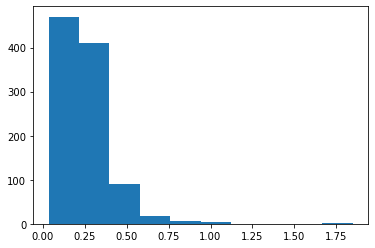

Sample mean: 0.24769397874695903
Sample variance: 0.02066867582606421
Expected value: 0.25
Variance of RV: 0.020833333333333336


In [432]:
#get R vector for five s
pareto_five = getMeanPareto(5, 5)

#plot results
plt.hist(pareto_five)
plt.show()

#print sample results
print("Sample mean: " + str(np.mean(pareto_five)))
print("Sample variance: " + str(np.var(pareto_five)))

#compute theoretical mean and var
stats_five = getEVar(5, 5)

#print theoretical results
print("Expected value: " + str(stats_five[0]))
print("Variance of RV: " + str(stats_five[1]))


The histogram is significantly less skewed as the previous two, as the highest node is not at the very minimum bin.

#### 7
Repeat with 25-tuples...


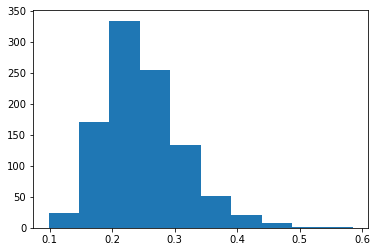

Sample mean: 0.2499004109590305
Sample variance: 0.0040710310132804454
Expected value: 0.25
Variance of RV: 0.004166666666666667


In [433]:
#get R vector for 25 s
pareto_twentyfive = getMeanPareto(5, 25)

#plot results
plt.hist(pareto_twentyfive)
plt.show()

#print sample results
print("Sample mean: " + str(np.mean(pareto_twentyfive)))
print("Sample variance: " + str(np.var(pareto_twentyfive)))

#compute theoretical mean and var
stats_twentyfive = getEVar(5, 25)

#print theoretical results
print("Expected value: " + str(stats_twentyfive[0]))
print("Variance of RV: " + str(stats_twentyfive[1]))


Again, the graph is getting less skewed (although still slightly right-skewed), as the highest node is nearing the median of the min and max values.

#### 8
... and with 1000-tuples

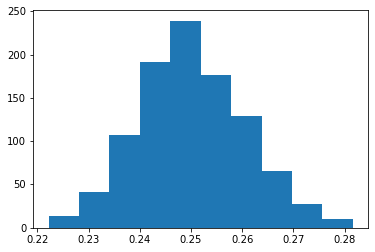

Sample mean: 0.25017022232897423
Sample variance: 0.00010582753406228337
Expected value: 0.25
Variance of RV: 0.00010416666666666667


In [434]:
#get R vector for thousand s
pareto_thousand = getMeanPareto(5, 1000)

#plot results
plt.hist(pareto_thousand)
plt.show()

#print sample results
print("Sample mean: " + str(np.mean(pareto_thousand)))
print("Sample variance: " + str(np.var(pareto_thousand)))

#compute theoretical mean and var
stats_thousand = getEVar(5, 1000)

#print theoretical results
print("Expected value: " + str(stats_thousand[0]))
print("Variance of RV: " + str(stats_thousand[1]))

The histogram is nearing a normal distribution: with a standard deviation of almost 0 is another hint at this transformation in distribution numerically. 

#### 9
Comment on the tuple size, and the shape of the histogram.  

Hint: consult Openintro Statistics 5.1.3 (p 172-178).


Ans: As the textbooks defines the CLM: 

"When observations are independent and the sample size is sufficiently large, the sample proportion ˆp will tend to follow a normal distribution with mean = p and standard error sqrt(p(1-p)/n)"  

where the formulas prove that the sd of 0 stated in section 8 above, because as n goes to infinity, sd should near 0

### Global temperature over time

In this question you will to work with satellite-based global temperature records. There
is quite a bit of debate about how satellite records relate to the actual near-ground temperature, here we simply say that we talk about “lower troposphere temperature”, whatever
it means. You can download the original dataset from University of Alabama, Huntsville
http://vortex.nsstc.uah.edu/data/msu/v6.0/tlt/uahncdc_lt_6.0.txt, on the version
on canvas we have done a little bit of cleaning.


Global warming is thought to bring both higher temperatures but also more extreme
weather. Can we see this in the data? Your task is to answer two questions:  

a) Do we observe a trend in the global temperature over time in this data?  
b) Do we observe a trend in the temporal variability of the global temperature in this data?

We base our conclusions on plots and visual inspection only, we do not compute any time
trends and confidence values.

#### 1

The values (esp the region and corresponding temp value) are of ratio type, as it is the deviation from 1991-2020 averages, as it is not the actual temperature (which would be interval), but is the deviation from the average so it has a clearly defined 0 (i.e, the temperature is the exactly the same as the average)

#### 2

Load the data. Perform basic sanity checks. Note: the data is whitespace separated.

In [435]:
df_temp = pd.read_csv('/home/jovyan/lost+found/INFO_370/UAH-lower-troposphere_wide.csv.bz2',  delim_whitespace=True) #for any number of spaces
df_temp.head() #sanity check to see if "sep =" worked correctly

,Year,Mo,Globe,Land,Ocean,NH,Land.1,Ocean.1,SH,Land.2,...,Ocean.5,NoPol,Land.6,Ocean.6,SoPol,Land.7,Ocean.7,USA48,USA49,AUST
0,1978,12,-0.48,-0.51,-0.47,-0.44,-0.46,-0.42,-0.52,-0.62,...,-0.45,-0.39,-0.68,-0.06,-0.45,-0.38,-0.49,-1.29,-1.15,-1.29
1,1979,1,-0.47,-0.64,-0.41,-0.64,-0.86,-0.50,-0.31,-0.13,...,-0.29,-0.46,-0.95,0.10,-0.15,-0.15,-0.16,-3.22,-2.42,0.92
2,1979,2,-0.43,-0.56,-0.39,-0.47,-0.57,-0.41,-0.39,-0.53,...,-0.36,-2.00,-2.30,-1.66,-0.80,-1.25,-0.58,-1.76,-1.84,-0.30
3,1979,3,-0.38,-0.51,-0.33,-0.46,-0.51,-0.44,-0.30,-0.53,...,-0.21,-0.56,-0.47,-0.65,-0.52,-1.25,-0.18,-0.70,-0.39,0.23
4,1979,4,-0.40,-0.57,-0.34,-0.47,-0.62,-0.37,-0.34,-0.46,...,-0.31,-0.84,-0.81,-0.87,-0.26,0.26,-0.51,-0.72,-0.46,-1.12


#### 3

 Make a simple plot to address the first question–the temperature trend. Which
variables do you want to plot? Comment the result: what, if anything, does the figure
suggest?

Hint: you may need a variable for time along the lines time = year + month/12


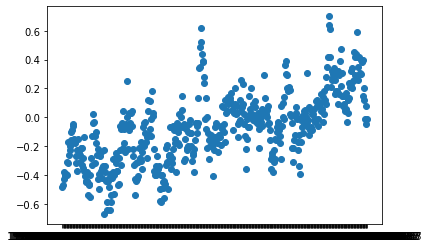

In [436]:
x = []
#convert year and month columns to year + month/12 for x-axis
for i in range (0, len(df_temp.Year)):
    x.append(str(df_temp.Year[i]+df_temp.Mo[i]/12))
    
#plot results
plt.scatter(x, df_temp.Globe)
plt.show()


As can be seen in the plot, although there are some inconsistencies that makes the points not very closely correlated linearly, the general trend is that as time increases, the deviation from the averages increases, meaning the temperature went from generally being under the average to being typically higher than the average.

#### 4

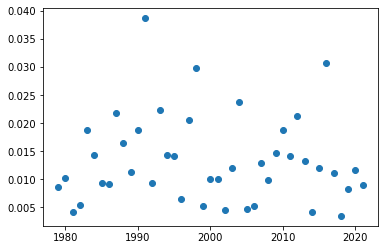

In [437]:
#get var for each year's global temp
var_global_year = df_temp[df_temp.Globe.isna() == False].groupby("Year").Globe.var()
#get unique years to match y length
x = df_temp.Year.unique()

#print results
plt.scatter(x, var_global_year)
plt.show() #does not seem to have a clear pattern

#### 5

Mean Temp vs Year


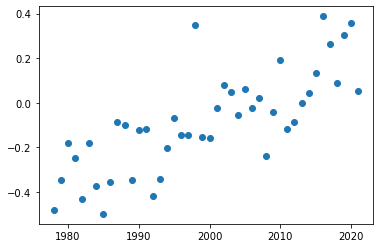

Median Temp vs Year


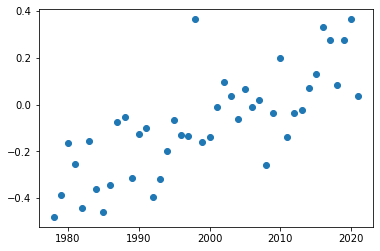

In [438]:
#get mean for each year's global temp
avg_global_year = df_temp[df_temp.Globe.isna() == False].groupby("Year").Globe.mean()

#print a title/differentiate between plots
print("Mean Temp vs Year")

#plot results
plt.scatter(x, avg_global_year)
plt.show()

#print a title/differentiate between plots
print("Median Temp vs Year")

#get median for each year's global temp
med_global_year = df_temp[df_temp.Globe.isna() == False].groupby("Year").Globe.median()

#plot results
plt.scatter(x, med_global_year)
plt.show()

In reference to the Lecture notes, while mean is the most common and intuitive, it is sometimes too sensitive to non-typical values and vice versa for median. Mean would be an issue if it made the relationship between x and y axis weaken. However, as seen in the plots, that is not the case, as they are both very similar (if not the median graph is has a smaller correlation).

#### 6

Mean Temp vs Decade


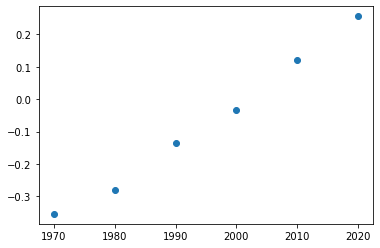

Median Temp vs Decade


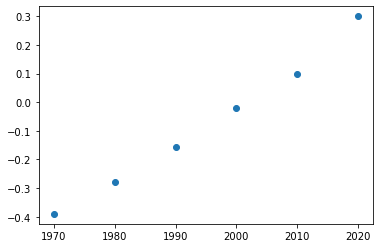

In [439]:
#make decade column and add to original df
decade = df_temp.Year // 10 * 10
df_temp['Decade'] = decade

#get mean for each decade's global temp
avg_global_dec = df_temp[df_temp.Globe.isna() == False].groupby("Decade").Globe.mean()

#print a title/differentiate between plots
print("Mean Temp vs Decade")
#make x list to match y length
x_dec = decade.unique()

#print results
plt.scatter(x_dec, avg_global_dec)
plt.show()

#print a title/differentiate between plots
print("Median Temp vs Decade")

#get median for each decade's global temp
med_global_dec = df_temp[df_temp.Globe.isna() == False].groupby("Decade").Globe.median()

#print results
plt.scatter(x_dec, med_global_dec)
plt.show()

#### 7

In [440]:
#get number of different obs for years in 1970s
count_1970 = df_temp.Decade[df_temp.Decade == 1970].values

#print count
print("Number of 1970 observations: " + str(len(count_1970)))

#get number of different obs for years in 2020s
count_2020 = df_temp.Decade[df_temp.Decade == 2020].values

#print count
print("Number of 2020 observations: " + str(len(count_2020)))

#print what complete count would be for a decade
print("\nHow many observations each decade should have: " + str(12*10))

Number of 1970 observations: 13
Number of 2020 observations: 18

How many observations each decade should have: 120


As the data collection in this data frame started in later 1978 and the 2020 decade has just started, there are not enough observations in each decade. Therefore, any inferences made with or of those years would not have sufficient evidence.

#### 8

a) Do we observe a trend in the global temperature over time in this data?  

Yes: in all the plots (regardless of temporal variability), there is a general or clear trend that, as time increases, the deviation from average global temperature is becoming more positive. In other words, as time increases, global temperature is getting hotter. 
  
b) Do we observe a trend in the temporal variability of the global temperature in this data?  

Yes: as the time is changed in variation (from month to year to decade), the relationship between time and global temperature becomes stronger in a direct linear relationship (i.e. correlation is higher). Each plot confirms the answer in question a) with more confidence of the positive relationship. The decade plot gives the most clear relationship (although I would consider removing 1970 and 2020 from the plot as they do not have as complete of data as the other decades).

#### Duration: 

~ 6 hours